In [ ]:
#Use Python Version 3.11.0


# Imports and Retrieving Data

In [2]:
import pandas as pd

In [3]:
train_df_path =  r"Dataset/train.csv"
train_df = pd.read_csv(train_df_path)

In [4]:
test_df_path = r"Dataset/test.csv"
test_df = pd.read_csv(test_df_path)

# Understanding The Code

In [12]:
train_df.shape

(593994, 13)

In [17]:
train_df.head(10)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
5,5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D1,1.0
6,6,61574.16,0.042,696,16907.71,13.52,Other,Single,High School,Self-employed,Debt consolidation,C5,1.0
7,7,45953.31,0.100,654,10111.62,12.82,Female,Married,High School,Employed,Home,D1,1.0
8,8,30592.29,0.132,713,7522.36,9.48,Male,Married,Bachelor's,Employed,Education,C5,1.0
9,9,17342.45,0.121,548,9653.48,16.04,Female,Married,Bachelor's,Self-employed,Vacation,F1,1.0


In [14]:
train_df.dtypes

id                        int64
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                   object
marital_status           object
education_level          object
employment_status        object
loan_purpose             object
grade_subgrade           object
loan_paid_back          float64
dtype: object

In [15]:
train_df.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

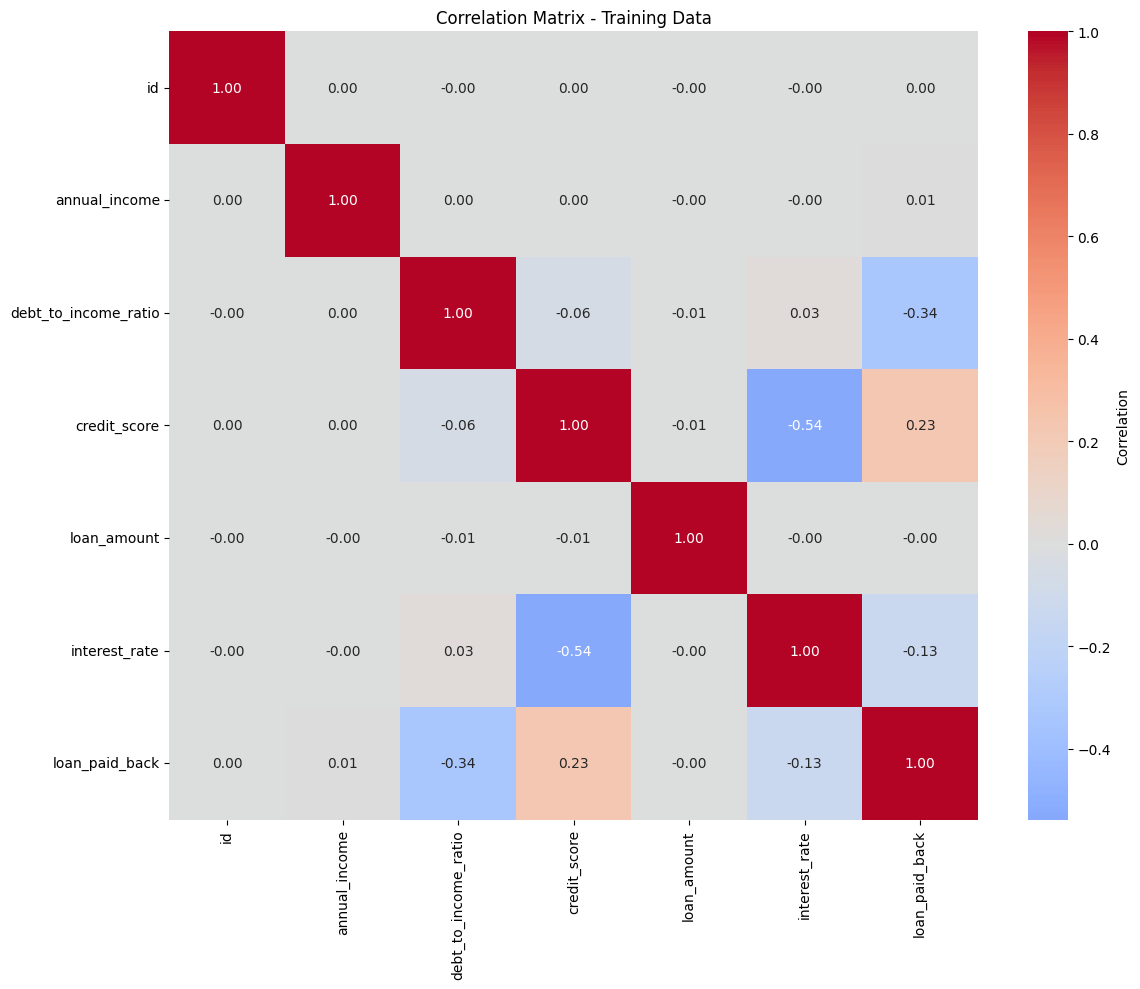

                            id  annual_income  debt_to_income_ratio  \
id                    1.000000       0.000775             -0.001679   
annual_income         0.000775       1.000000              0.000553   
debt_to_income_ratio -0.001679       0.000553              1.000000   
credit_score          0.001772       0.001509             -0.061617   
loan_amount          -0.001973      -0.003407             -0.008236   
interest_rate        -0.001020      -0.002507              0.030316   
loan_paid_back        0.001387       0.006326             -0.335680   

                      credit_score  loan_amount  interest_rate  loan_paid_back  
id                        0.001772    -0.001973      -0.001020        0.001387  
annual_income             0.001509    -0.003407      -0.002507        0.006326  
debt_to_income_ratio     -0.061617    -0.008236       0.030316       -0.335680  
credit_score              1.000000    -0.005761      -0.538335        0.234560  
loan_amount              -

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns only
correlation_matrix = train_df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - Training Data')
plt.tight_layout()
plt.show()

# Display the correlation matrix
print(correlation_matrix)

# Checking Each Column Individually


In [9]:
print("The Min Value Is" ,train_df['annual_income'].min())
print("The Max Value Is", train_df['annual_income'].max())

The Min Value Is 6002.43
The Max Value Is 393381.74


In [10]:
train_df['gender'].value_counts()

gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

In [12]:
train_df['education_level'].value_counts()

education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64

In [13]:
train_df['employment_status'].value_counts()

employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

In [14]:
train_df['loan_purpose'].value_counts()

loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation                8449
Name: count, dtype: int64

In [15]:
train_df['grade_subgrade'].value_counts()

grade_subgrade
C3    58695
C4    55957
C2    54443
C1    53363
C5    53317
D1    37029
D3    36694
D4    35097
D2    34432
D5    32101
B2    15167
B1    14344
B5    13937
B3    13926
B4    13877
E4     8036
E3     7075
E1     6891
E2     6372
E5     6084
F5     5947
F4     5535
F1     5534
F2     5203
F3     5082
A5     2471
A3     2066
A2     2018
A4     1701
A1     1600
Name: count, dtype: int64

In [41]:
# Example numeric columns from your dataset
num_cols = [
    'annual_income',
    'debt_to_income_ratio',
    'credit_score',
    'loan_amount',
    'interest_rate'
]

# Compute IQR, skewness, min, max, and range for each numeric column
summary_stats = pd.DataFrame({
    'IQR': [train_df[col].quantile(0.75) - train_df[col].quantile(0.25) for col in num_cols],
    'Skewness': [train_df[col].skew() for col in num_cols],
    'Min': [train_df[col].min() for col in num_cols],
    'Max': [train_df[col].max() for col in num_cols],
    'Range': [train_df[col].max() - train_df[col].min() for col in num_cols]
}, index=num_cols)

print(summary_stats)

                            IQR  Skewness       Min         Max       Range
annual_income         33046.920  1.719509  6002.430  393381.740  387379.310
debt_to_income_ratio      0.084  1.406680     0.011       0.627       0.616
credit_score             73.000 -0.166993   395.000     849.000     454.000
loan_amount            8578.960  0.207360   500.090   48959.950   48459.860
interest_rate             2.690  0.049945     3.200      20.990      17.790


In [30]:
test_df.isnull().sum()

id                          0
annual_income               0
debt_to_income_ratio        0
credit_score                0
loan_amount                 0
interest_rate               0
gender                      0
marital_status              0
education_level             0
employment_status           0
loan_purpose                0
grade_subgrade          11751
dtype: int64

# Logistic Regression Training


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

cat_cols = [
    'gender',
    'marital_status',
    'education_level',
    'employment_status',
    'loan_purpose',
    'grade_subgrade'
]

X = train_df.drop(columns=['loan_paid_back'])
y =train_df['loan_paid_back']

num_cols = [col for col in X.columns if col not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', LogisticRegression(
        max_iter=500,
        solver='lbfgs'
    ))
])



In [8]:
X = train_df.drop(columns=['loan_paid_back'])
y =train_df['loan_paid_back']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)

/Users/steven/Steven's Things/VSC/Python/Competition/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'marital_status',
                                                   'education_level',
                                                   'employment_status',
                                                   'loan_purpose',
                                                   'grade_subgrade']),
                                                 ('num', 'passthrough',
                                                  ['id', 'annual_income',
                                                   'debt_to_income_ratio',
                                                   'credit_score',
                                                   'loan_amount',
                                                   'interest_rate'])])),
                ('clf', LogisticRegression(max_iter=500))])

In [9]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve
)

# Predict labels and probabilities
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]   # Probability of class 1

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Print results
print("Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")


Model Evaluation Metrics:
Accuracy:  0.8980
Precision: 0.8964
Recall:    0.9862
F1 Score:  0.9392
ROC AUC:   0.8680


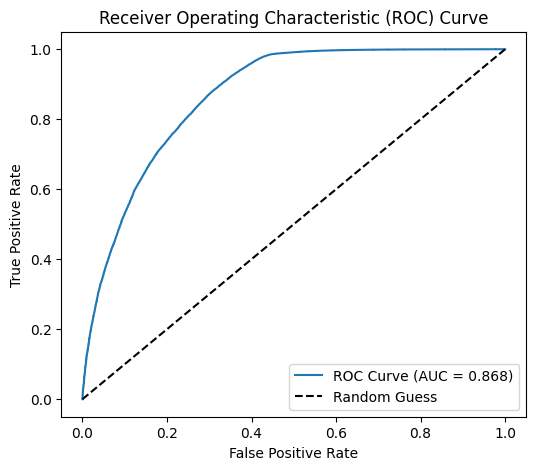

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


loan_paid_back
1.0    0.799024
0.0    0.200976
Name: proportion, dtype: float64


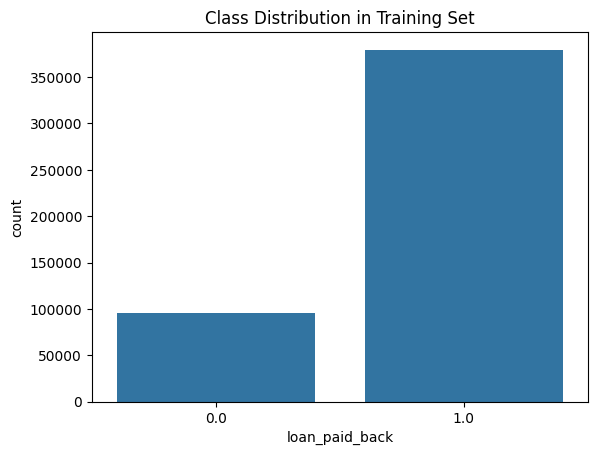

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print(y_train.value_counts(normalize=True))

# Optional visual check
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.show()


# Logistic Regression Testing

In [12]:
import pandas as pd

# Load test data
test_df

# Predict probabilities
test_df['loan_paid_back'] = model.predict_proba(test_df)[:, 1]

# Make sure the columns are exactly: id, loan_paid_back
submission = test_df[['id', 'loan_paid_back']]

# Save the submission file
submission.to_csv("LR1.csv", index=False)


# Decision Tree

# K-Nearest Neighbour


# Random Forest Training

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# Categorical columns
cat_cols = [
    'gender',
    'marital_status',
    'education_level',
    'employment_status',
    'loan_purpose',
    'grade_subgrade'
]

# Feature/target split
X = train_df.drop(columns=['loan_paid_back'])
y = train_df['loan_paid_back']

# Numerical columns (everything not categorical)
num_cols = [col for col in X.columns if col not in cat_cols]

# Preprocessing: OHE for categoricals, passthrough numericals
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# Pipeline with RandomForest
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])
# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [6]:

# Train model
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

auc = roc_auc_score(y_val, y_proba)

print(f"Random Forest model trained. Validation ROC-AUC: {auc:.4f}")

Random Forest model trained. Validation ROC-AUC: 0.9059


In [7]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score
)

# Predict labels and probabilities
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]   # Probability of class 1

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Print results
print("\nModel Evaluation Metrics (Random Forest):")
print(f"Accuracy:   {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"F1 Score:   {f1:.4f}")
print(f"ROC AUC:    {roc_auc:.4f}")



Model Evaluation Metrics (Random Forest):
Accuracy:   0.9014
Precision:  0.9042
Recall:     0.9802
F1 Score:   0.9407
ROC AUC:    0.9059


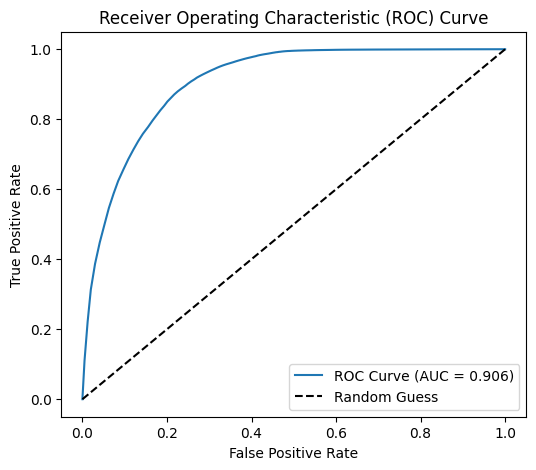

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Random Forest Testing

In [11]:
import pandas as pd

# Load test data
test_df

# Predict probabilities using the pipeline
test_df['loan_paid_back'] = model.predict_proba(test_df)[:, 1]

# Format exactly as required for Kaggle
submission = test_df[['id', 'loan_paid_back']]

# Save the submission file
submission.to_csv("Random Forest V1.csv", index=False)

# Support Vector Machine

# Neural Network